MODULOS 

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn import linear_model
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

In [120]:
def imprime_resultados(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()  
    print(f'a faixa da acuracia fica {((media - 2 * desvio_padrao)*100):.2f}% até {((media + 2 * desvio_padrao)*100):.2f}%')

CARREGANDO DATA

In [121]:
dados = pd.read_csv('/content/kc_house_data.csv')
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [122]:
renomear = {
    'id':'identificaçâo',
    'date':'data',
    'price':'preco',
    'bedrooms':'dormitorios',
    'sqft_living':'metro_quadrado',
    'sqft_lot':'metragem_quadrada_do_lote',
    'floors':'pisos',
    'waterfront':'fonte_de_agua',
    'view':'visâo',
    'codition':'condição',
    'grade':'avaliação',
    'sqft_above':'metragem_quadrada_da_casa_além_do_porão',
    'sqft_basement':'metragem_quadrada_do_porão',
    'lat':'Cordenada_de_latitude',
    'long':'Cordenada_de_longitude',
    'sqft_living15':'Área_da_sala_de_estar_em_2015',
    'yr_built':'Ano_de_construção',
    'yr_renovated':'Ano_de_renovação',
    'zipcode':'zip_code',
    'sqft_lot15':'Área_do_tamanho_do_lote_em_2015(implicando-reformas)',
    'bathrooms':'banheiros'
}

dados.rename(mapper = renomear, axis=1, inplace=True)
dados.head(5)

,identificaçâo,data,preco,dormitorios,banheiros,metro_quadrado,metragem_quadrada_do_lote,pisos,fonte_de_agua,visâo,...,avaliação,metragem_quadrada_da_casa_além_do_porão,metragem_quadrada_do_porão,Ano_de_construção,Ano_de_renovação,zip_code,Cordenada_de_latitude,Cordenada_de_longitude,Área_da_sala_de_estar_em_2015,Área_do_tamanho_do_lote_em_2015(implicando-reformas)
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


PROCURANDO VALORES NULOS

In [123]:
print(dados.isnull().any())
print(dados.dtypes)

identificaçâo                                           False
data                                                    False
preco                                                   False
dormitorios                                             False
banheiros                                               False
metro_quadrado                                          False
metragem_quadrada_do_lote                               False
pisos                                                   False
fonte_de_agua                                           False
visâo                                                   False
condition                                               False
avaliação                                               False
metragem_quadrada_da_casa_além_do_porão                 False
metragem_quadrada_do_porão                              False
Ano_de_construção                                       False
Ano_de_renovação                                        False
zip_code

In [124]:
dados = dados.drop(['identificaçâo', 'data'],axis=1)

In [125]:
dados.head(5)

,preco,dormitorios,banheiros,metro_quadrado,metragem_quadrada_do_lote,pisos,fonte_de_agua,visâo,condition,avaliação,metragem_quadrada_da_casa_além_do_porão,metragem_quadrada_do_porão,Ano_de_construção,Ano_de_renovação,zip_code,Cordenada_de_latitude,Cordenada_de_longitude,Área_da_sala_de_estar_em_2015,Área_do_tamanho_do_lote_em_2015(implicando-reformas)
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


PAIRPLOT PARA VISUALIZAÇÃO

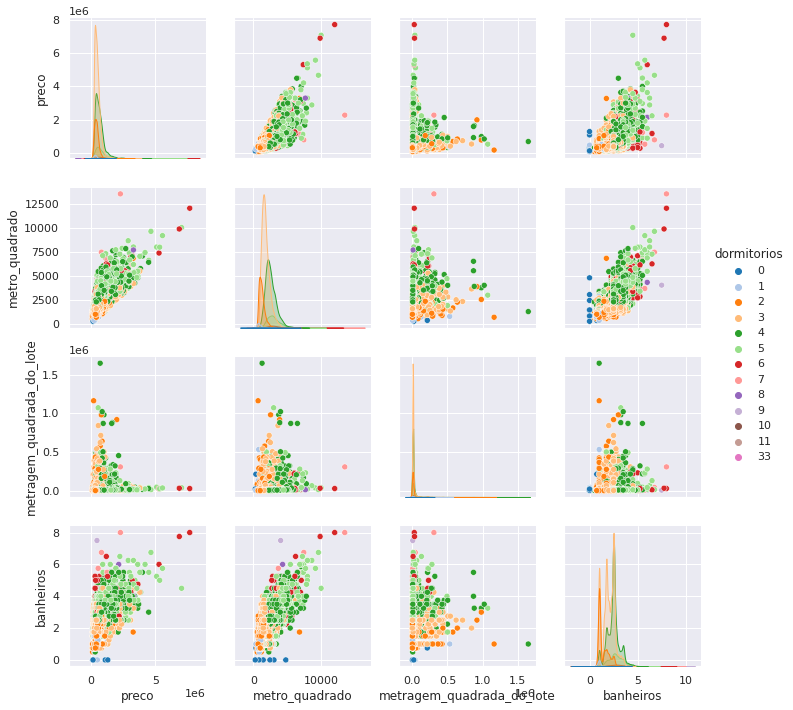

In [126]:
#divisão por quantia de dormitorios
sns.pairplot(dados[['preco', 'metro_quadrado', 'metragem_quadrada_do_lote', 'banheiros','dormitorios']],
             hue='dormitorios',palette='tab20')

CORRELAÇÃO

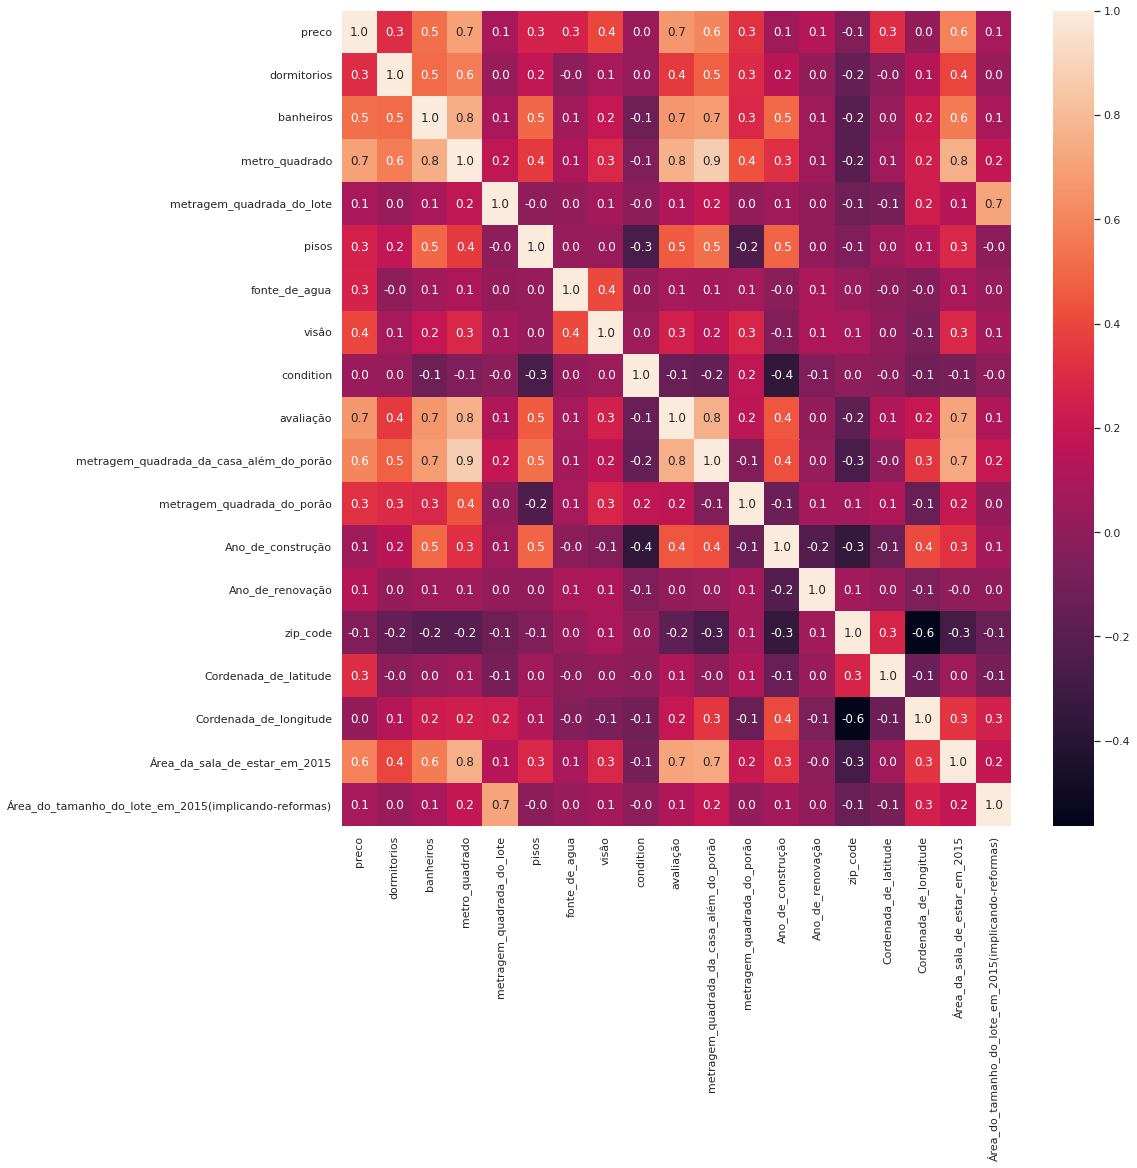

In [127]:
correlacao = dados.corr()
plt.figure(figsize= (15, 15))
sns.set(font_scale=1)
sns.heatmap(correlacao, annot=True ,fmt='.1f')

COMPARAÇÃO METRAGEM EM RELAÇÃO AO PREÇO

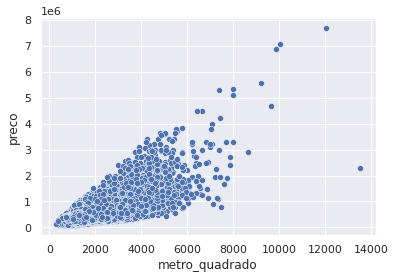

In [128]:
sns.scatterplot(x = 'metro_quadrado', y = 'preco', data=dados)

metodo Train_test_split

In [129]:
x = dados.iloc[:,1:].values
y = dados.iloc[:,0].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

IMPLEMENTANDO O MODELO LARSCV() com CROSS VALIDATE

In [130]:
scaler_SS = StandardScaler()
scaler_SS.fit(x_train)

StandardScaler()

In [ ]:
SEED = 123
np.random.seed(SEED)

cv = KFold(n_splits=15,shuffle=True)

regressor = linear_model.LarsCV(cv = cv)

pipeline = Pipeline([('scaler', scaler_SS), ('regressor', regressor)])

resultado = cross_validate(pipeline, x_test, y_test, cv=cv, return_train_score=False)

In [132]:
imprime_resultados(resultado)

a faixa da acuracia fica 61.66% até 76.48%


MIN MAX SCALER E LINEAR REGRESSION

In [133]:
scaler_MMS = MinMaxScaler()
scaler_MMS.fit_transform(dados)

array([[0.01926557, 0.09090909, 0.125     , ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.06072131, 0.09090909, 0.28125   , ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.01377049, 0.06060606, 0.125     , ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.04289849, 0.06060606, 0.09375   , ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.04262295, 0.09090909, 0.3125    , ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.03278689, 0.06060606, 0.09375   , ..., 0.18272425, 0.10686629,
        0.00081098]])

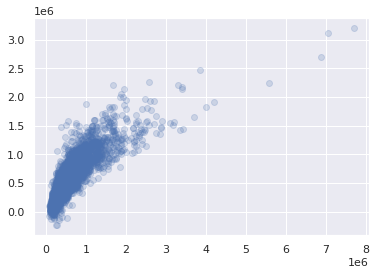

In [134]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
plt.scatter(x=y_test, y=y_pred, alpha=0.2)

RANDOM FOREST REGRESSOR

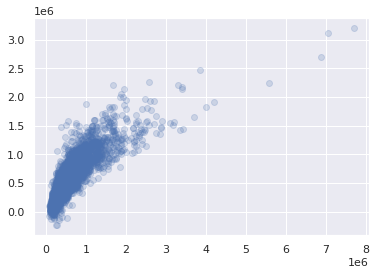

In [135]:
from sklearn.tree import export_graphviz
import graphviz

modelo = RandomForestRegressor(max_depth=2)
modelo.fit(x_train,y_train)
previsao = modelo.predict(x_test)
plt.scatter(x=y_test, y=y_pred, alpha=0.2)

In [136]:
x = dados.iloc[:,1:].values
y = dados.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

KNN REGRESSION

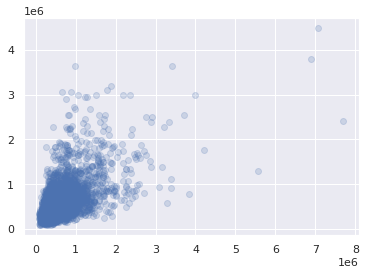

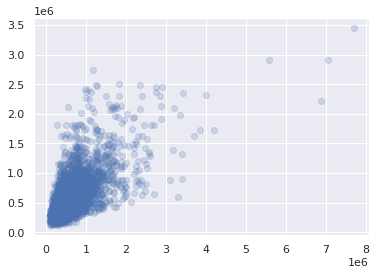

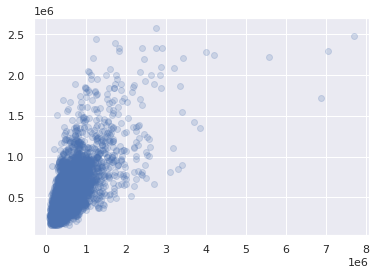

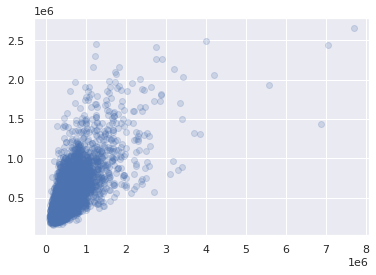

In [156]:
knn_r_n_neighbors = []
for i in range(1,5):
  Knn_r = KNeighborsRegressor(n_neighbors=i)

  y = Knn_r.fit(x_train, y_train)
  y_pred = Knn_r.predict(x_test)
  tabela = Knn_r.score(x_test,y_pred)

  knn_r_n_neighbors.append(tabela)

  plt.scatter(x=y_test, y=y_pred, alpha=0.2, label='1_n')
  plt.show()

resultados = pd.DataFrame(knn_r_n_neighbors,columns = ['neighbors'])